# Part II - PROSPER LOAN DATA EXPLORATION
## by Ashinze Emmanuel Chidi


## Investigation Overview


> Being able to forecast the repayment of a loan beforre approval is a huge asset to loan companies. The status of a loan is a huge insight if patterns can be drawn with other features in the dataset. The loan status depends on the income and expenses of a person or company. Therefore EmploymentStatus, IncomeRange, EmploymentStatusDuration, Borrower Rate will help in predicting the status of the loan. Analysis was done on the dataset to discover what affects the status of a loan.

## Dataset Overview

>  Prosper Loan Data: This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The link to the data set is as follows https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_status = pd.read_csv('loan_data_cleaned.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Loan status
> The loan status of each loan has different categories from current loans to paid loans.
Majority of the loans are either current,completed or charged off.
Although there are a number of defaulted or past due loans, on the general view, people pay up their loans.
65.9% of the loans are currrent, 23.7% completed , 6.5% charged off, 2.5% past due loans and 1.2% loans defaulted. Only 0.2 % of the loans have the total payment in progress.
A total of 3058 loans were not paid out of a total of 83507.

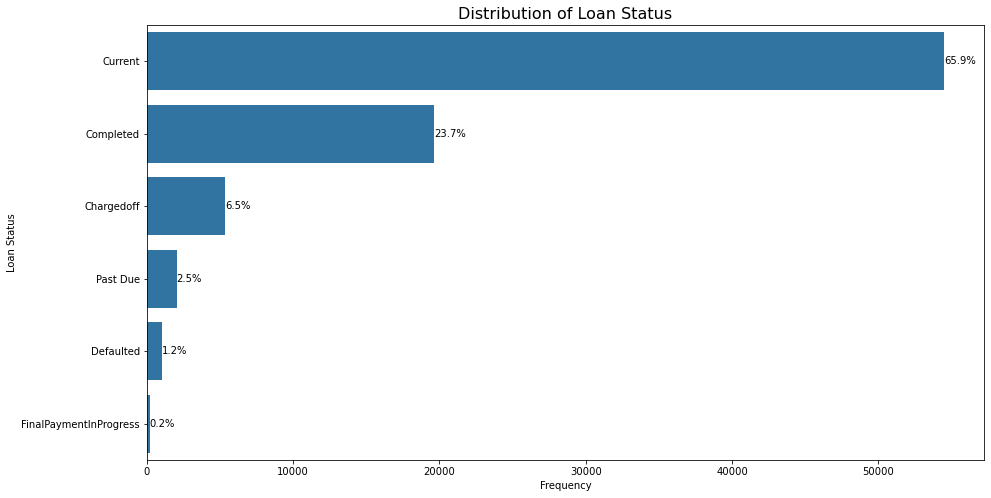

In [3]:
#creating the  barchart
loan_status_counts = df_status.LoanStatus.value_counts()

# get the unique values in the decreasing order of the frequency
loan_status_order = loan_status_counts.index

# return the sum of all not-null values
n_loan = loan_status_counts.sum()

plt.figure(figsize = (15,8))
plt.rc('axes', titlesize=16) 
sb.countplot(
    data = df_status, 
    y = 'LoanStatus', 
    order = loan_status_order,
    color = sb.color_palette()[0]
)
plt.title('Distribution of Loan Status')

plt.ylabel('Loan Status')
plt.xlabel('Frequency')

for i in range (loan_status_counts.shape[0]):
    count = loan_status_counts[i]
    # convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100 * count / n_loan) + '%'
    # print the string value on the bar
    plt.text(count + 1, i, pct_string, va = 'center')

## Distribution of Employment status

> Nearly all borrowers are employed and very few unemployed. This is expected as the ability to pay for a loan depends on a source of income, without being employed, it will be difficult to pay the loans. Although there are retirees dependimg on pensions that also take loans and other that are not actively employed but have rich relatives that can help with the loans.

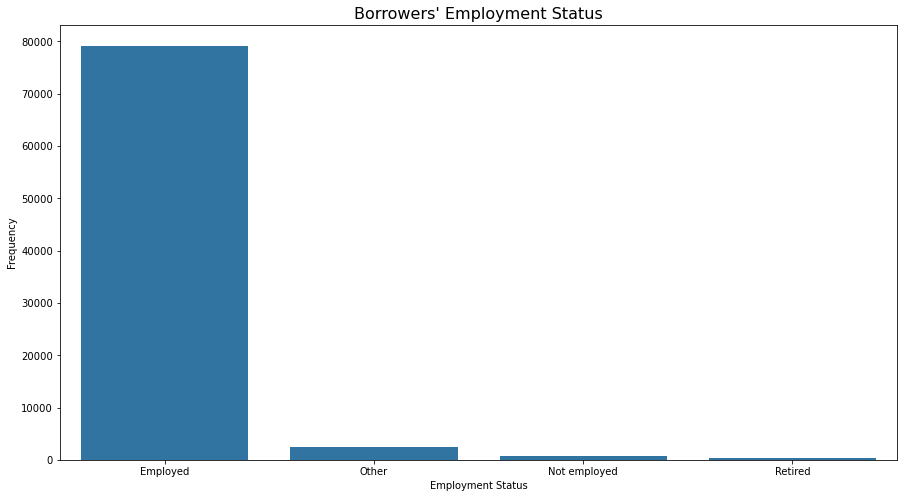

In [4]:
plt.figure(figsize = (15,8))
sb.countplot(
    data = df_status, 
    x = 'EmploymentStatus',
    order = df_status.EmploymentStatus.value_counts().index,
    color = sb.color_palette()[0]
)
plt.title("Borrowers' Employment Status");
plt.ylabel('Frequency');
plt.xlabel('Employment Status');

## Distribution of Employment Status Duration
> The distribution of employment status duration is skewed to the right with the prescence of many high outliers. This means people at the early stages of their career take more loans as compared to people with many years of work.
 This can be associated to the increment in salary with time. Although there are people with many years of work that takes loans, over 50% of the borrowers have less than 6 years work duration.



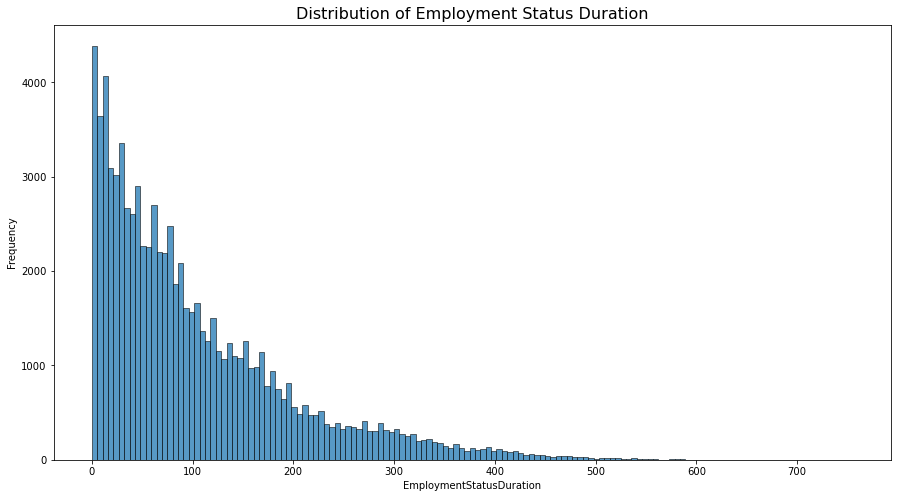

In [5]:
plt.figure(figsize = (15,8))
sb.histplot(x='EmploymentStatusDuration',data = df_status)
plt.title('Distribution of Employment Status Duration');
plt.ylabel('Frequency');

## Distribution Occupation
> It can be deduced from the graphs that Professionals, Salesmen ,Executives and programmers borrow more than the other professions. Judges and dentists have the lowest number of borrowers, this can be associated to the fact that they are high income earners.

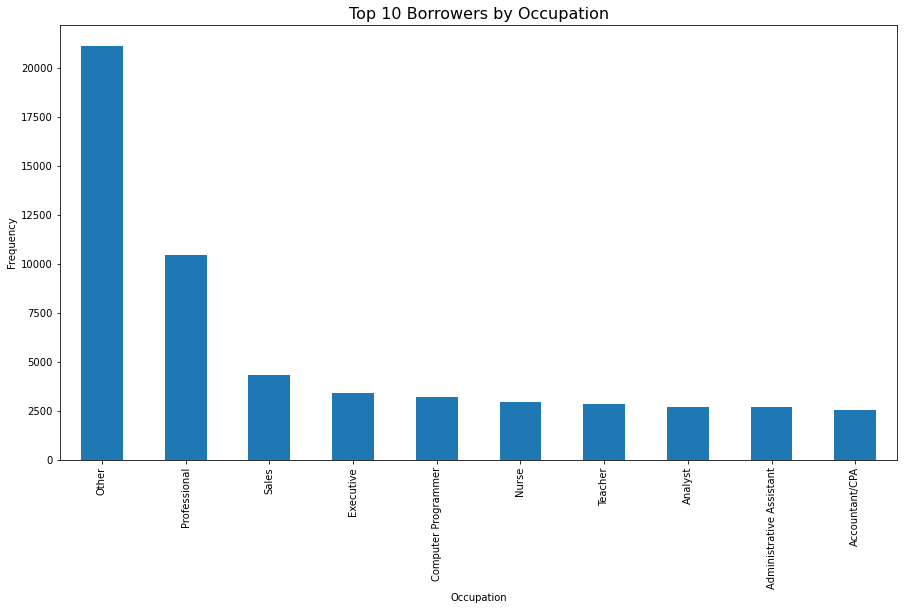

In [6]:
plt.figure(figsize = (15,8));
df_status['Occupation'].value_counts().sort_values(ascending=False)[0:10].plot(kind ='bar');
plt.xlabel('Occupation');
plt.ylabel('Frequency');
plt.title('Top 10 Borrowers by Occupation');

## Distribution Term of Loan
> The length of loans is a huge determinant of the status of the loan. Most of the loans are 36 months in duration with just few 12 months loan.

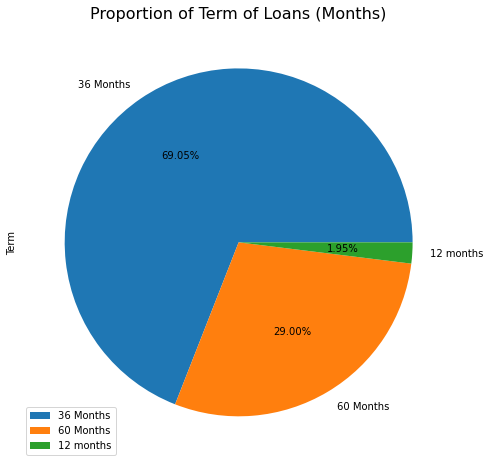

In [7]:
plt.figure(figsize = (15,8));
df_status['Term'].value_counts().plot(kind='pie',autopct = '%.2f%%',labels =['36 Months','60 Months','12 months']);
plt.legend(); 
plt.title('Proportion of Term of Loans (Months)');


## Distribution Location of Borrowers
> Geographical location can affect the behaviours of borrowers and type of loans. Standards of living can affecting borrowing habits.California, New York and Texas have the highest amount of borrowers.

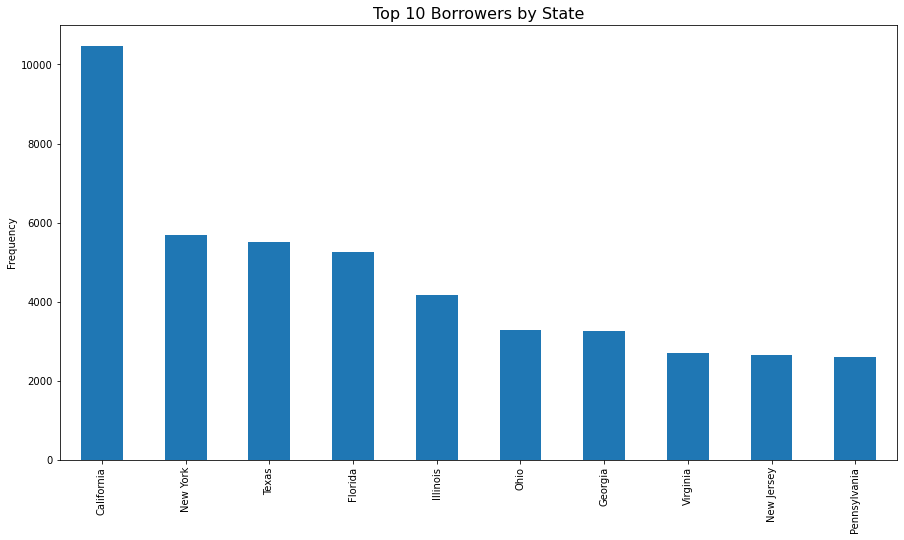

In [8]:
plt.figure(figsize = (15,8));
df_status['state_full'].value_counts().sort_values(ascending=False)[0:10].plot(kind ='bar');
plt.title('Top 10 Borrowers by State');
plt.ylabel('Frequency');

## Prosper Score Vs Loan Status
> The borrowers with current loans dominates across the prosper scores. Regardless of the proper scor, current loans have the highest proportion

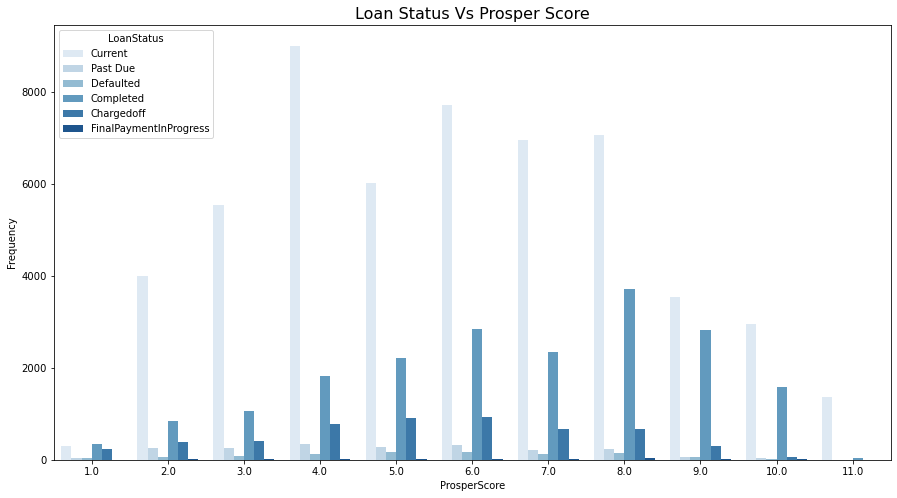

In [9]:
#plot the bar chachart
plt.figure(figsize = [15, 8]) ;
sb.countplot(data = df_status, x = 'ProsperScore', hue = 'LoanStatus', palette = 'Blues');
plt.title('Loan Status Vs Prosper Score');
plt.ylabel('Frequency');
                      

## Employment Status Duration Vs Loan Original Amount
> There seems to be a very weak positive relationship between the Employment Duration and Loan Original Amount. Maybe the time spent at work does not influence amount of loans.

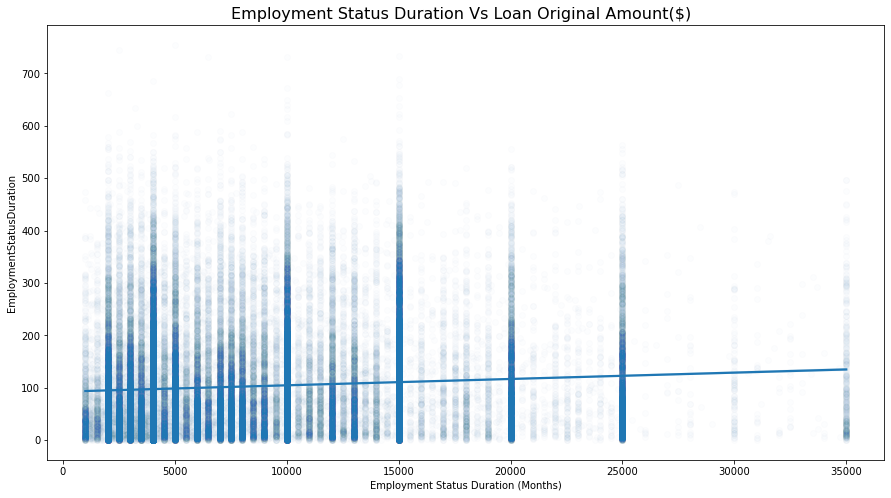

In [10]:

#plot the regplot
plt.figure(figsize = [15, 8]);
sb.regplot(data = df_status, x = 'LoanOriginalAmount', y = 'EmploymentStatusDuration', scatter_kws={'alpha':0.01});
plt.title('Employment Status Duration Vs Loan Original Amount($)  ');
plt.xlabel('Loan Original Amount($)');
plt.xlabel('Employment Status Duration (Months)');

## How Term Affects Loan status and Loan amount
> Most loans with high loan amount are for a long term and this trend is constant across the different loan statuses.

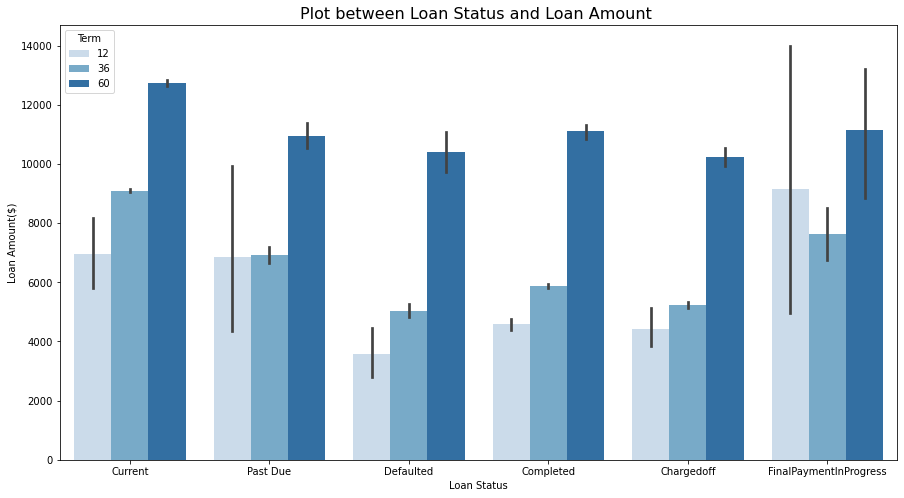

In [11]:
plt.figure(figsize = [15, 8]);
sb.barplot(data = df_status, x='LoanStatus', y='LoanOriginalAmount', hue='Term', palette='Blues');
plt.xlabel('Loan Status');
plt.ylabel('Loan Amount($)');
plt.title('Plot between Loan Status and Loan Amount ');

# THANK YOU !

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert slides.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 